In [1]:
import numpy as np
import cv2 as cv
import scipy as sp
import matplotlib.pyplot as plt
from stitcher import file_mods

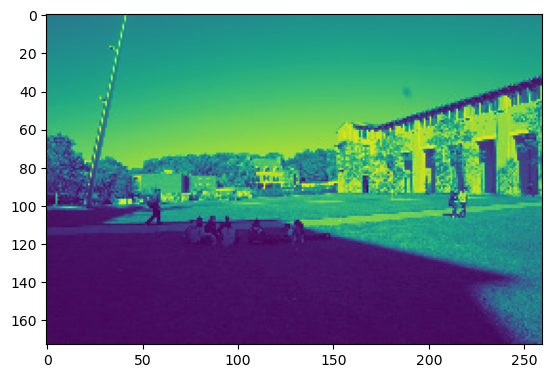

In [2]:
img = cv.imread('./test-data/CMU0-1/modified/01.JPG', cv.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

In [3]:
# No. of Images: 1
# Max Width/Height: sqrt(m^2+n^2)

N = 2
canvas = int(np.sqrt((img.shape[0]*N)**2 + (img.shape[1]*N)**2)) + 1
canvas = (canvas, canvas)

In [4]:
coords, vals = file_mods.GenerateCoordsFromImage(img)
transformed = np.zeros(coords.shape)

In [5]:
A = np.array([[1, 0], [0, -1]])
i=0
for coord in coords:
    coord = coord.reshape((-1,1))
    coord = A @ coord
    transformed[i,:] = coord.reshape(2)
    i+=1

In [6]:
print(coords)

[[  0.   0.]
 [  0.   1.]
 [  0.   2.]
 ...
 [172. 257.]
 [172. 258.]
 [172. 259.]]


In [7]:
print(transformed)

[[   0.    0.]
 [   0.   -1.]
 [   0.   -2.]
 ...
 [ 172. -257.]
 [ 172. -258.]
 [ 172. -259.]]


In [8]:
test = file_mods.DrawImageFromCoords(transformed, vals, (0,0), canvas)

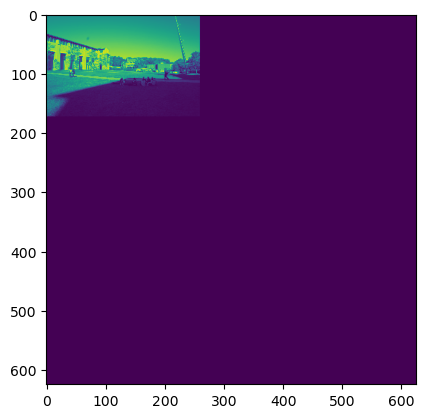

In [9]:
plt.imshow(test)
plt.show()

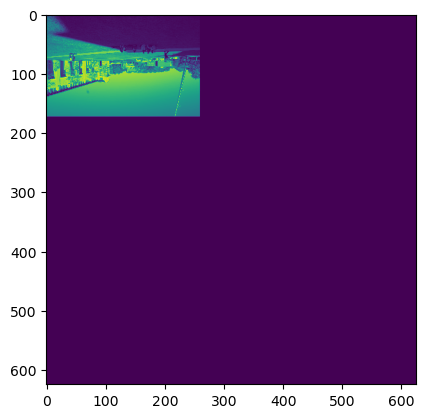

In [10]:
A = np.array([[-1, 0], [0, -1]])
i=0
for coord in coords:
    coord = coord.reshape((-1,1))
    coord = A @ coord
    transformed[i,:] = coord.reshape(2)
    i+=1

test = file_mods.DrawImageFromCoords(transformed, vals, (0,0), canvas)
plt.imshow(test)
plt.show()

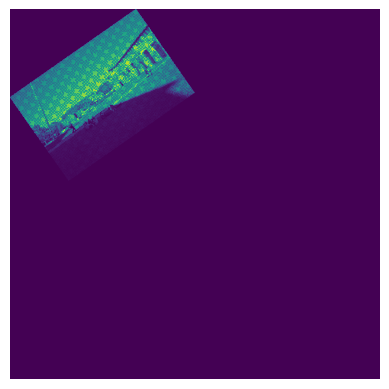

In [11]:
angle = np.deg2rad(35)
A = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
i=0
for coord in coords:
    coord = coord.reshape((-1,1))
    coord = A @ coord
    transformed[i,:] = coord.reshape(2)
    i+=1

test = file_mods.DrawImageFromCoords(transformed, vals, (0,0), canvas)
plt.imshow(test, vmin=0, vmax=255)
plt.axis(False)
plt.show()

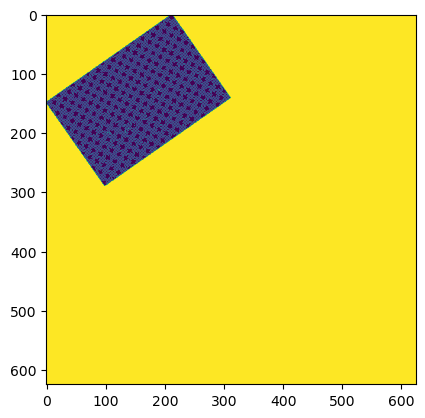

In [12]:
plt.imshow(test==0, vmin=0, vmax=1)
plt.axis(True)
plt.show()

In [13]:
print(test[150,1])

106


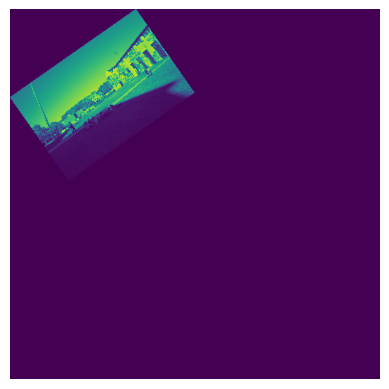

In [14]:
interp_test = file_mods.interpolate(test)
plt.imshow(interp_test)
plt.axis(False)
plt.show()

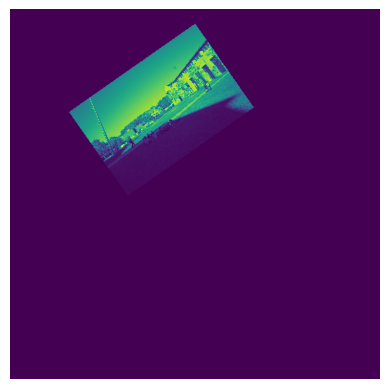

In [16]:
test = file_mods.DrawImageFromCoords(transformed, vals, (25,100), canvas)
interp_test = file_mods.interpolate(test)

plt.imshow(interp_test)
plt.axis(False)
plt.show()